In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/crop_yield.csv")
print(data)

           Crop  CropYear       Season           State      Area  Production  \
0      Arecanut      2019  Kharif       Andhra Pradesh    1096.0       10418   
1     Arhar/Tur      2019  Kharif       Andhra Pradesh  237647.0      114451   
2     Arhar/Tur      2019  Rabi         Andhra Pradesh    5940.0        3747   
3         Bajra      2019  Kharif       Andhra Pradesh   20484.0       47045   
4         Bajra      2019  Rabi         Andhra Pradesh    4592.0       11322   
...         ...       ...          ...             ...       ...         ...   
1016  Sunflower      2019  Kharif          West Bengal    7842.0        9576   
1017    Tobacco      2019  Whole Year      West Bengal   15151.0       20457   
1018       Urad      2019  Kharif          West Bengal   66846.0       44876   
1019       Urad      2019  Rabi            West Bengal    5502.0        5215   
1020      Wheat      2019  Rabi            West Bengal  188308.0      509970   

      AnnualRainfall   Fertilizer  Pest

In [ ]:
data.head()

,Crop,CropYear,Season,State,Area,Production,AnnualRainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2019,Kharif,Andhra Pradesh,1096.0,10418,899.2,188248.96,405.52,7.253333
1,Arhar/Tur,2019,Kharif,Andhra Pradesh,237647.0,114451,899.2,40818248.72,87929.39,0.440000
2,Arhar/Tur,2019,Rabi,Andhra Pradesh,5940.0,3747,899.2,1020254.40,2197.80,0.430000
3,Bajra,2019,Kharif,Andhra Pradesh,20484.0,47045,899.2,3518331.84,7579.08,2.004545
4,Bajra,2019,Rabi,Andhra Pradesh,4592.0,11322,899.2,788721.92,1699.04,2.480000


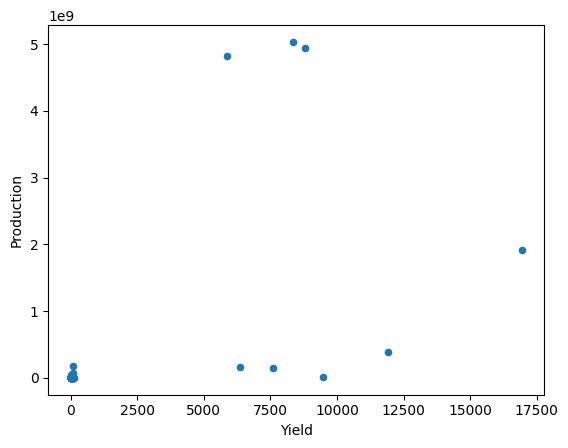

In [ ]:
data.plot.scatter(x='Yield', y='Production');

In [ ]:
data.shape

(1021, 10)

In [ ]:
x=data['Production'].values.reshape(-1,1)
y=data['Yield'].values.reshape(-1,1)

In [ ]:
x.shape

(1021, 1)

In [ ]:
SEED = 40

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [ ]:
print(x_train)
print(y_train)

[[       688]
 [      4210]
 [      1865]
 [   2701810]
 [     19444]
 [        57]
 [      2517]
 [     89432]
 [      1626]
 [     44950]
 [   1750601]
 [     21329]
 [       465]
 [      4620]
 [     36316]
 [    274809]
 [       460]
 [     22030]
 [  14869966]
 [ 390028000]
 [      4637]
 [    159883]
 [      1039]
 [     94770]
 [     83939]
 [         0]
 [      2098]
 [     33683]
 [     51278]
 [      1238]
 [      6653]
 [     68562]
 [    394898]
 [     13554]
 [     23400]
 [       342]
 [       919]
 [   2463000]
 [      6271]
 [      2193]
 [     10498]
 [       789]
 [      1000]
 [      3089]
 [        65]
 [     23420]
 [      3231]
 [    142367]
 [    378700]
 [     15842]
 [        22]
 [      2910]
 [      9576]
 [   3798058]
 [       704]
 [         0]
 [        48]
 [    887440]
 [       164]
 [     50064]
 [         4]
 [       850]
 [   1793440]
 [     18085]
 [      2039]
 [    128036]
 [       269]
 [     24556]
 [      3313]
 [      1404]
 [      6423]
 [    

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0     2.808214  44.422271
1     0.384286  43.808815
2     0.871538  43.764482
3     0.737500  43.758782
4     2.274483  43.854323
..         ...        ...
200   1.791176  44.265723
201  81.091500  46.257603
202   0.758636  43.771808
203   2.268000  43.756299
204   3.610625  53.418543

[205 rows x 2 columns]


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 108.62
Mean squared error: 925628.81
Root mean squared error: 962.10


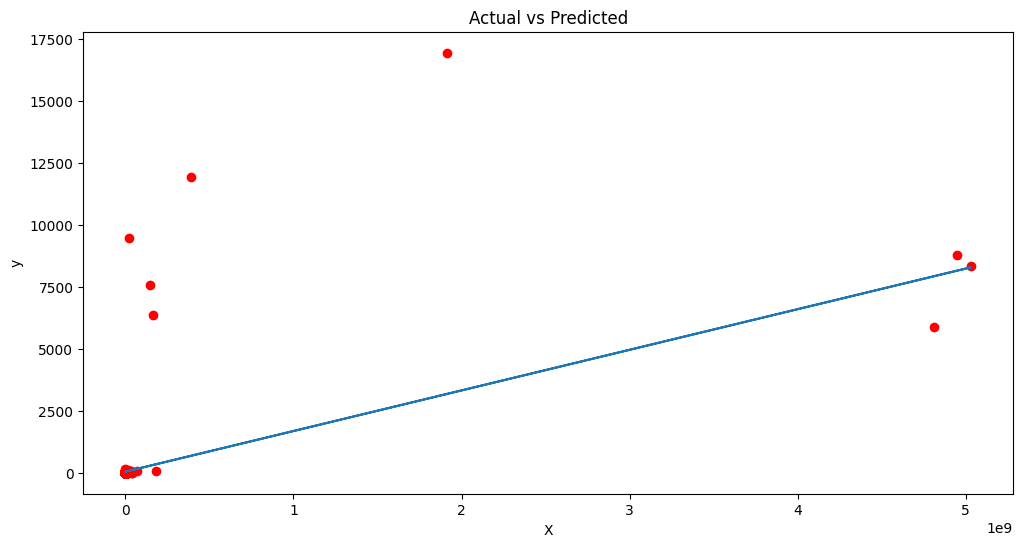

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(x,y,'ro')
plt.plot(x_test,y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()